# Exploratory Data Analysis (EDA) 

## 01 -  Imports📦


In [17]:
import os

import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import folium
from folium.plugins import HeatMap

from sklearn.feature_extraction.text import CountVectorizer


## 02 -  Load the Dataset 📂


In [3]:
os.chdir('C:/Users/Evelyn/Desktop/Insidium/Rental_NY_Prediction')

In [113]:
data = pd.read_csv("data/cleaned_database.csv")

In [114]:
data.head()

bairro_group        bairro  latitude  longitude        room_type  price  \
0    Manhattan       Midtown  40.75362  -73.98377  Entire home/apt  225.0   
1    Manhattan        Harlem  40.80902  -73.94190     Private room  150.0   
2     Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   89.0   
3    Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   80.0   
4    Manhattan   Murray Hill  40.74767  -73.97500  Entire home/apt  200.0   

   minimo_noites  numero_de_reviews  reviews_por_mes  disponibilidade_365  \
0              1                 45         0.380000                  355   
1              3                  0         1.373251                  365   
2              1                270         4.640000                  194   
3             10                  9         0.100000                    0   
4              3                 74         0.590000                  129   

   ano_ultima_review  mes_ultima_review  dia_ultima_review  
0               2019                  5                 21  
1               2018                  6                 16  
2               2019                  7                  5  
3               2018                 11                 19  
4               2019                  6                 22

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bairro_group         48894 non-null  object 
 1   bairro               48894 non-null  object 
 2   latitude             48894 non-null  float64
 3   longitude            48894 non-null  float64
 4   room_type            48894 non-null  object 
 5   price                48894 non-null  float64
 6   minimo_noites        48894 non-null  int64  
 7   numero_de_reviews    48894 non-null  int64  
 8   reviews_por_mes      48894 non-null  float64
 9   disponibilidade_365  48894 non-null  int64  
 10  ano_ultima_review    48894 non-null  int64  
 11  mes_ultima_review    48894 non-null  int64  
 12  dia_ultima_review    48894 non-null  int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 4.8+ MB


In [7]:
data.describe()

latitude     longitude         price  minimo_noites  \
count  48894.000000  48894.000000  48894.000000   48894.000000   
mean      40.728951    -73.952169    152.755130       7.030085   
std        0.054529      0.046157    240.145697      20.510741   
min       40.499790    -74.244420     10.000000       1.000000   
25%       40.690100    -73.983070     69.000000       1.000000   
50%       40.723075    -73.955680    106.000000       3.000000   
75%       40.763117    -73.936273    175.000000       5.000000   
max       40.913060    -73.712990  10000.000000    1250.000000   

       numero_de_reviews  reviews_por_mes  calculado_host_listings_count  \
count       48894.000000     48894.000000                   48894.000000   
mean           23.274758         1.373251                       7.144005   
std            44.550991         1.497781                      32.952855   
min             0.000000         0.010000                       1.000000   
25%             1.000000         0.280000                       1.000000   
50%             5.000000         1.220000                       1.000000   
75%            24.000000         1.580000                       2.000000   
max           629.000000        58.500000                     327.000000   

       disponibilidade_365  ano_ultima_review  mes_ultima_review  \
count         48894.000000       48894.000000       48894.000000   
mean            112.776169        2018.228576           6.137808   
std             131.618692           1.059182           2.257870   
min               0.000000        2011.000000           1.000000   
25%               0.000000        2018.000000           6.000000   
50%              45.000000        2019.000000           6.000000   
75%             227.000000        2019.000000           7.000000   
max             365.000000        2019.000000          12.000000   

       dia_ultima_review  
count       48894.000000  
mean           15.831738  
std             8.808540  
min             1.000000  
25%             8.000000  
50%            16.000000  
75%            23.000000  
max            31.000000

In [8]:
data.columns

Index(['bairro_group', 'bairro', 'latitude', 'longitude', 'room_type', 'price',
       'minimo_noites', 'numero_de_reviews', 'reviews_por_mes',
       'calculado_host_listings_count', 'disponibilidade_365',
       'ano_ultima_review', 'mes_ultima_review', 'dia_ultima_review'],
      dtype='object')

In [9]:
numeric_cols = data.select_dtypes(include=np.number).columns

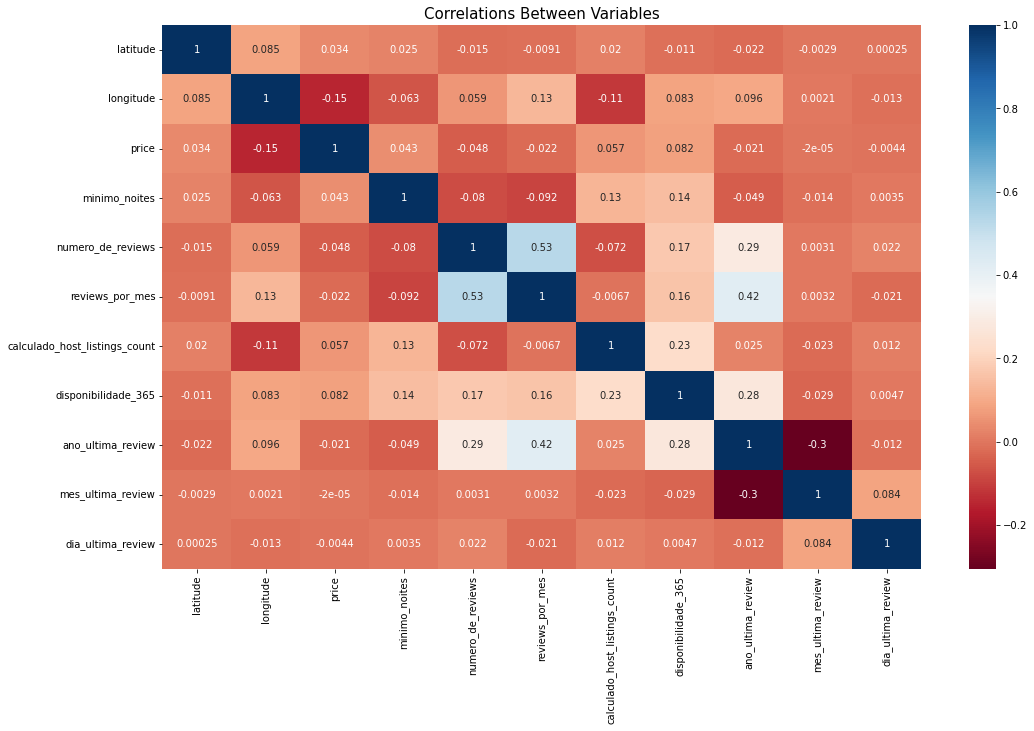

In [10]:
plt.figure(figsize=(17,10))
sns.heatmap(data[numeric_cols].corr(),annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

Upon examining the correlation matrix, we notice that the numerical features do not show strong relevance or high correlation with the target variable(price).

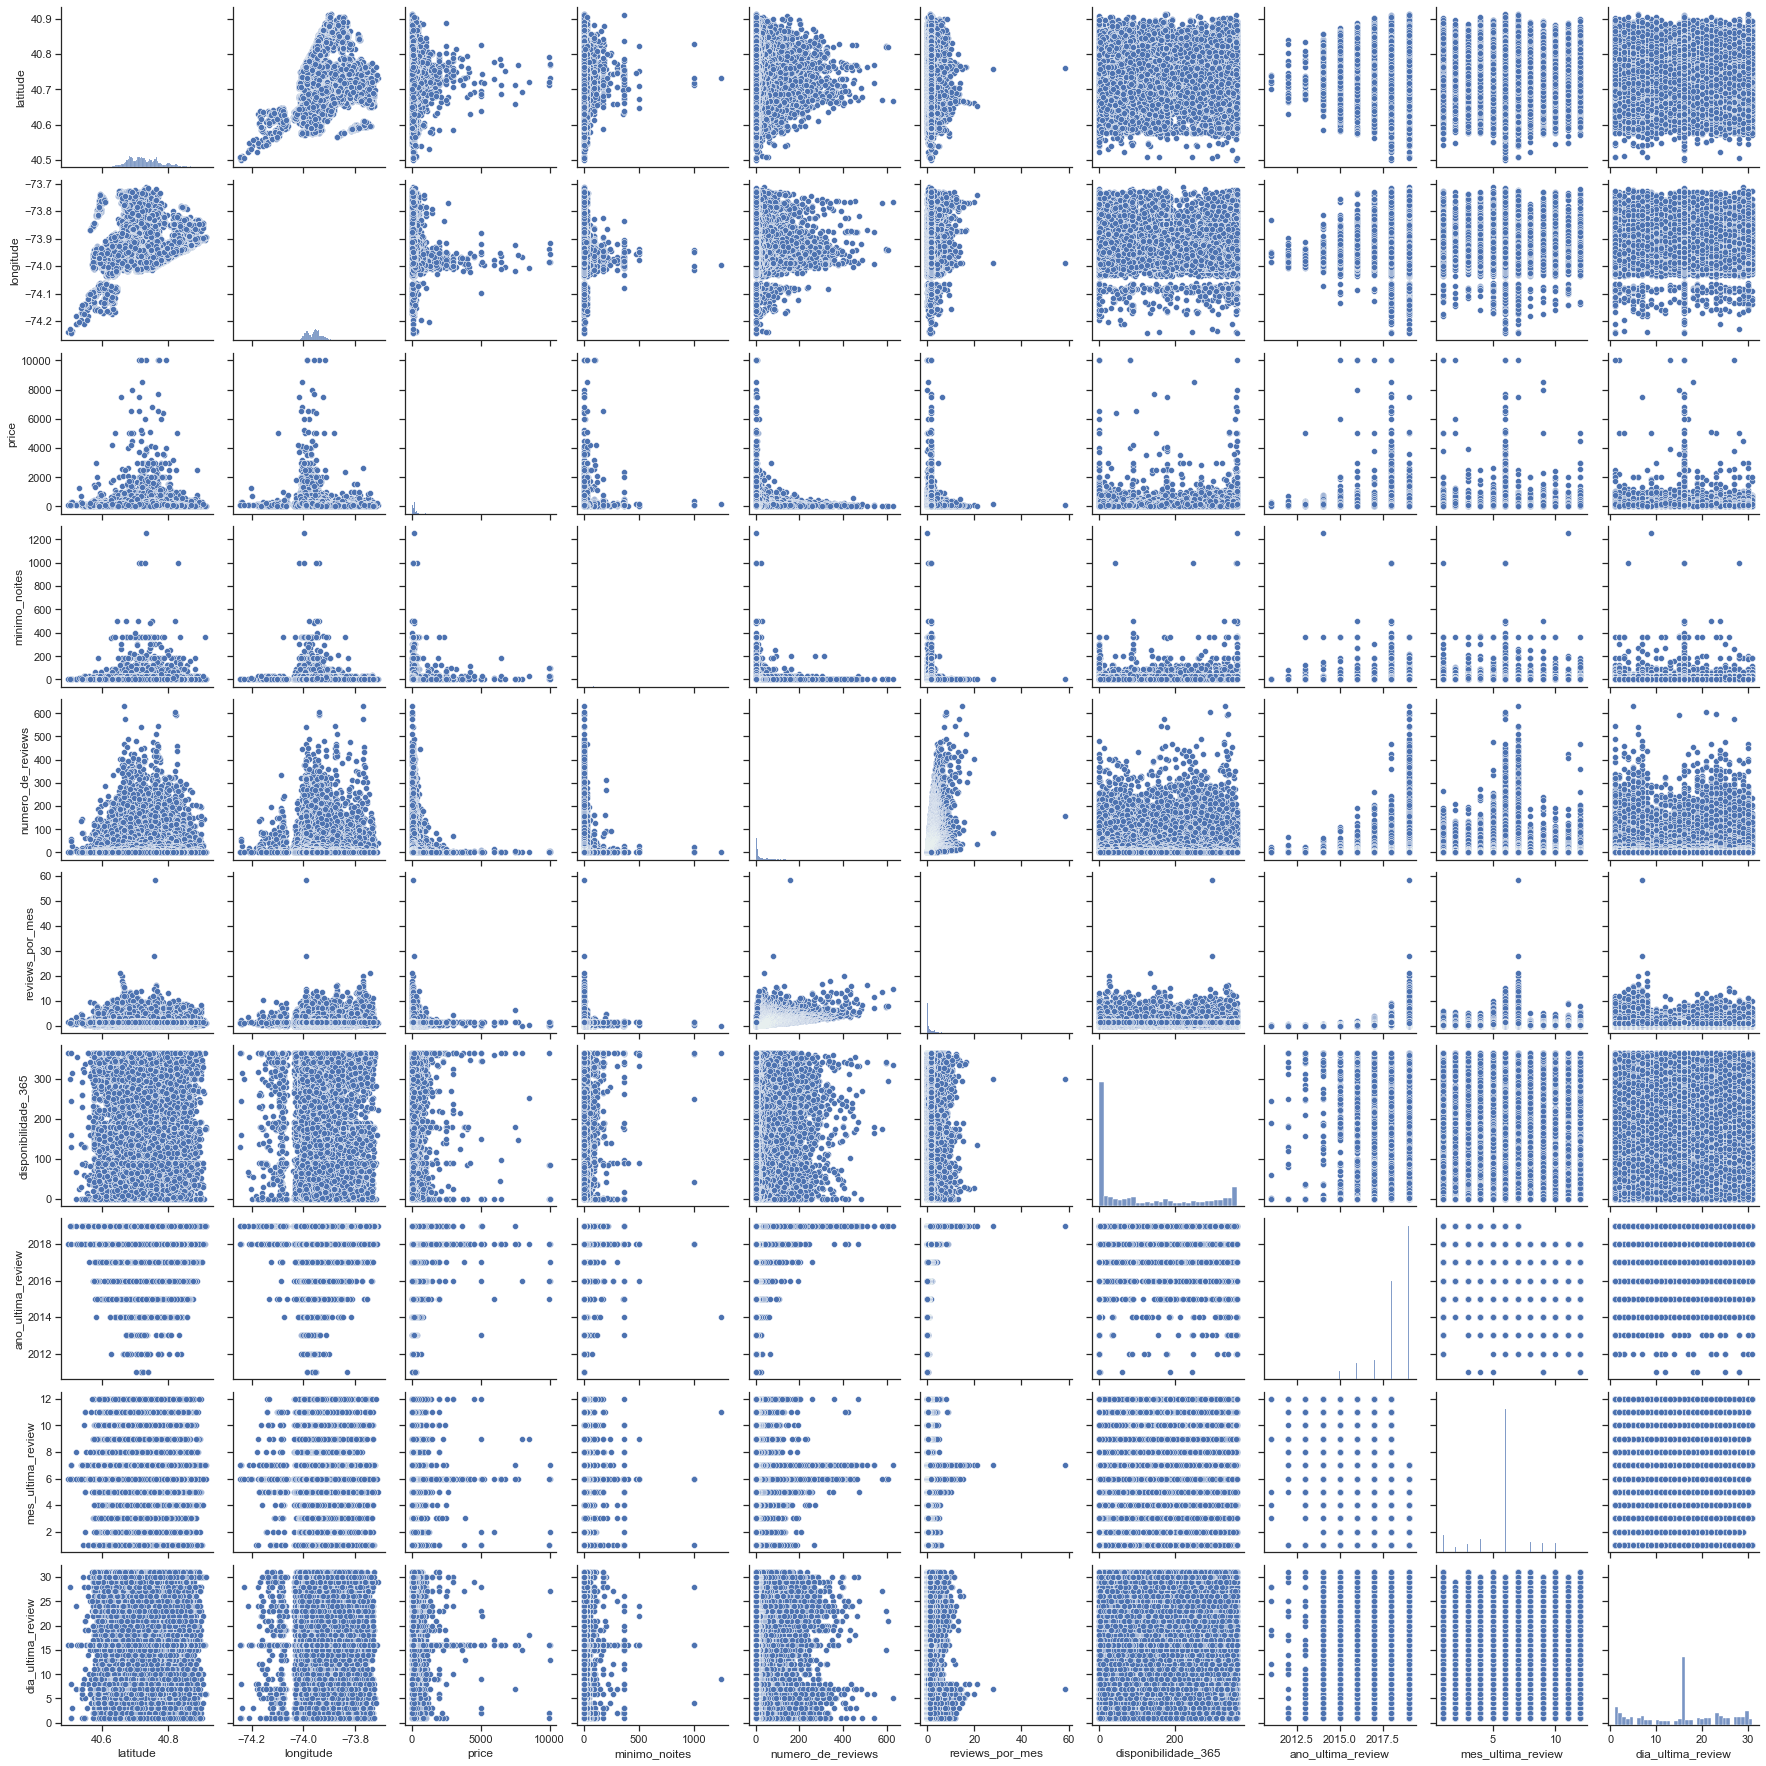

In [118]:
sns.pairplot(data)

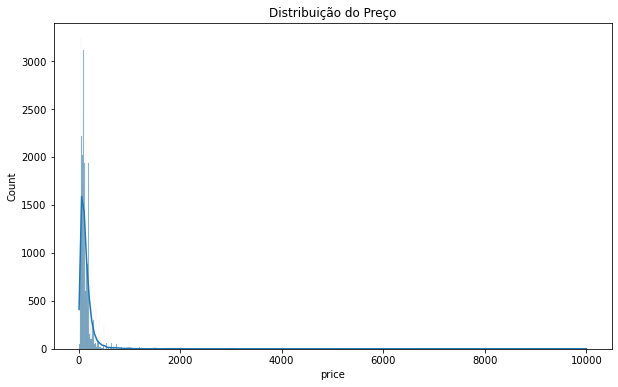

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribuição do Preço')
plt.show()

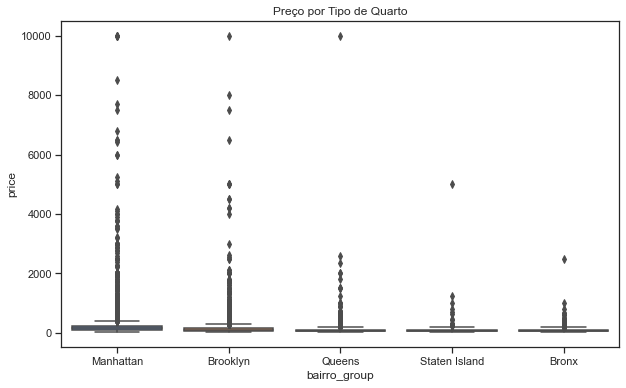

In [117]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bairro_group', y='price', data=data)
plt.title('Preço por Tipo de Quarto')
plt.show()

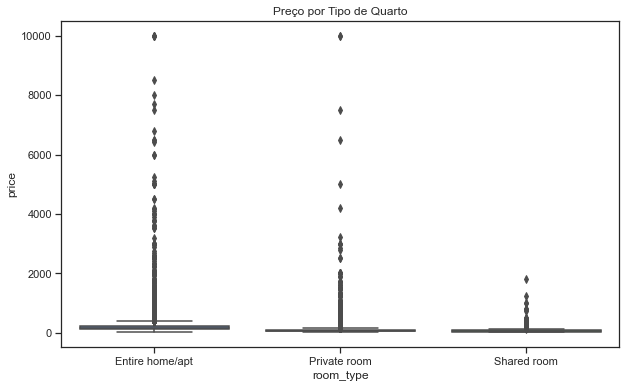

In [116]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=data)
plt.title('Preço por Tipo de Quarto')
plt.show()

##  Geographical Distribution of Listings

In [104]:
fig = px.scatter_mapbox(data,  
                        lat="latitude",
                        lon="longitude",
                        color='price',
                        size='price',
                        color_continuous_scale=px.colors.diverging.RdBu,
                        size_max=15,
                        zoom=10,
                        title='Spatial Distribution and Price Variation',
                        height=600, width=1000,
                        opacity=0.9  
                       )

fig.update_layout(mapbox_style="open-street-map") 
fig.show()

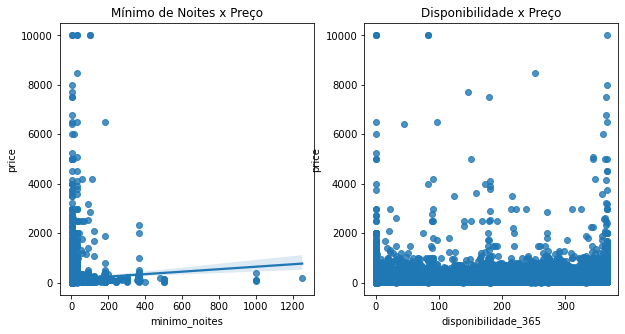

In [16]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.regplot(x='minimo_noites', y='price', data=data)
plt.title('Mínimo de Noites x Preço')
plt.subplot(1, 2, 2)
sns.regplot(x='disponibilidade_365', y='price', data=data)
plt.title('Disponibilidade x Preço')
plt.show()

In [18]:
vectorizer = CountVectorizer(stop_words='english')
bag_of_words = vectorizer.fit_transform(data['bairro'])
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

In [19]:
words_freq

[('east', 6592),
 ('williamsburg', 3920),
 ('harlem', 3775),
 ('upper', 3769),
 ('stuyvesant', 3751),
 ('bedford', 3714),
 ('heights', 3582),
 ('village', 3164),
 ('west', 2757),
 ('bushwick', 2465),
 ('hell', 1958),
 ('kitchen', 1958),
 ('crown', 1564),
 ('midtown', 1545),
 ('hill', 1473),
 ('park', 1325),
 ('flatbush', 1121),
 ('greenpoint', 1115),
 ('chelsea', 1113),
 ('district', 1112),
 ('gardens', 939),
 ('lower', 911),
 ('astoria', 900),
 ('washington', 899),
 ('prospect', 892),
 ('bay', 792),
 ('slope', 790),
 ('financial', 744),
 ('island', 649),
 ('city', 625),
 ('clinton', 572),
 ('fort', 544),
 ('long', 537),
 ('lefferts', 535),
 ('greene', 489),
 ('murray', 485),
 ('kips', 470),
 ('flushing', 426),
 ('ridgewood', 423),
 ('elmhurst', 422),
 ('greenwich', 392),
 ('sunset', 390),
 ('chinatown', 368),
 ('sunnyside', 363),
 ('soho', 358),
 ('morningside', 346),
 ('gramercy', 338),
 ('south', 324),
 ('ditmars', 309),
 ('steinway', 309),
 ('hills', 305),
 ('theater', 288),
 ('nol

In [21]:
top_bairros = data.groupby('bairro')['price'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 bairros com preços médios mais altos:\n", top_bairros)



Top 10 bairros com preços médios mais altos:
 bairro
Tribeca              490.638418
Riverdale            442.090909
Battery Park City    367.557143
Flatiron District    341.925000
Randall Manor        336.000000
NoHo                 295.717949
SoHo                 287.103352
Midtown              282.719094
West Village         267.682292
Greenwich Village    263.405612
Name: price, dtype: float64


In [24]:
data.columns

Index(['bairro_group', 'bairro', 'latitude', 'longitude', 'room_type', 'price',
       'minimo_noites', 'numero_de_reviews', 'reviews_por_mes',
       'calculado_host_listings_count', 'disponibilidade_365',
       'ano_ultima_review', 'mes_ultima_review', 'dia_ultima_review'],
      dtype='object')


Correlation Matrix:
                         price  minimo_noites  disponibilidade_365
price                1.000000       0.042804             0.081845
minimo_noites        0.042804       1.000000             0.144320
disponibilidade_365  0.081845       0.144320             1.000000


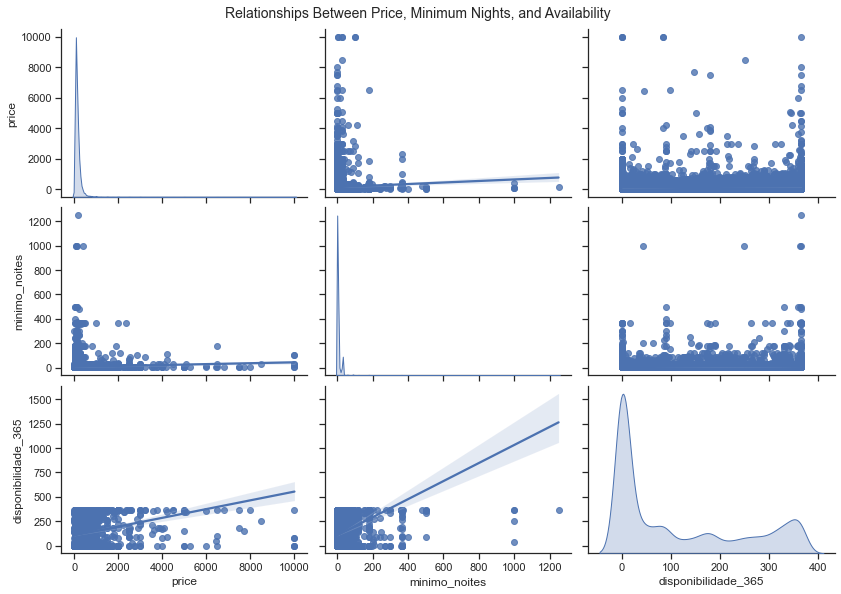

In [89]:
relevant_cols = ['price', 'minimo_noites', 'disponibilidade_365']

# Create the pairplot
sns.set(style="ticks") #Set style for improved visuals.
g = sns.pairplot(data[relevant_cols], diag_kind="kde", kind="reg", height=3, aspect=1.2, palette="viridis") #diag_kind sets the diagonal plots to kernel density estimations. kind sets the off-diagonal plots to regression plots.

# Customize the plots
g.fig.suptitle("Relationships Between Price, Minimum Nights, and Availability", y=1.02, fontsize=14) #Added title to the pairplot.
g.fig.set_size_inches(12, 8) #Adjust figure size.


# Calculate correlation coefficients
correlation_matrix = data[relevant_cols].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

plt.show()

In [ ]:
num_cols = ['price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 
            'calculado_host_listings_count', 'disponibilidade_365']

## Average Feature Values by Neighborhood and Room Type: A Comparative Analysis

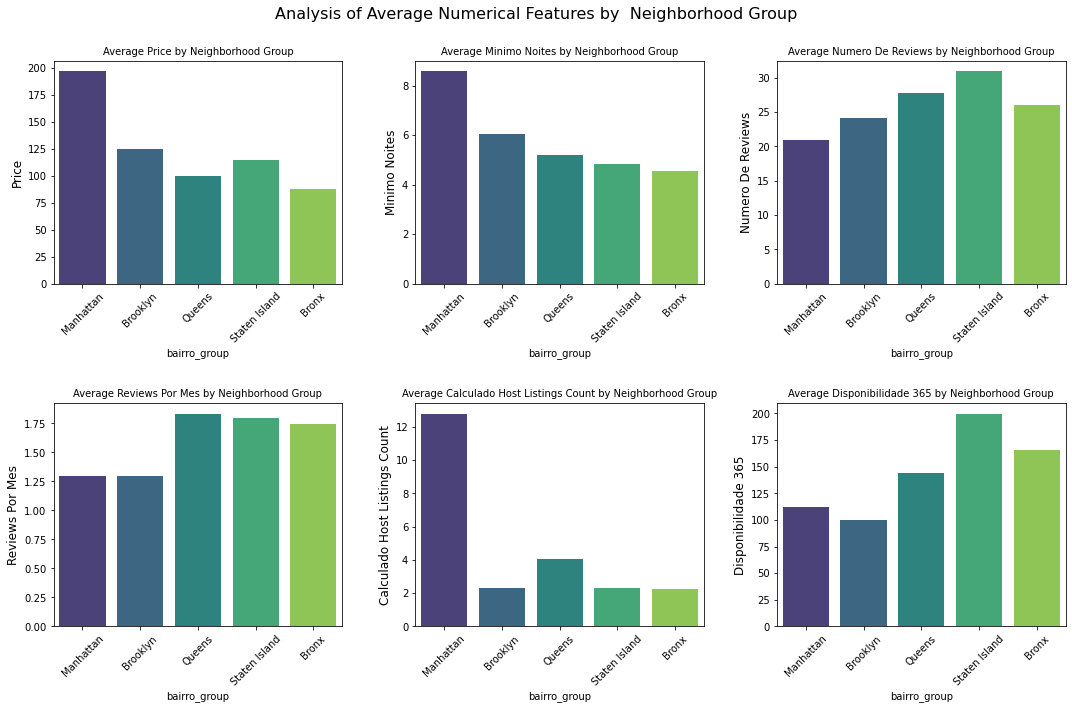

In [38]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=[15, 10])
fig.suptitle('Analysis of Average Numerical Features by  Neighborhood Group\n', fontsize=16)

ax = ax.flatten()

for idx, col in enumerate(num_cols):
    sns.barplot(x='bairro_group', y=col, data=data, estimator=np.mean, ax=ax[idx], ci=None, palette="viridis") 
    ax[idx].set_ylabel(col.replace('_', ' ').title(), fontsize=12) 
    ax[idx].tick_params(axis='x', rotation=45, labelsize=10) 
    ax[idx].set_title(f'Average {col.replace("_", " ").title()} by Neighborhood Group', fontsize=10)  

plt.tight_layout(w_pad=3, h_pad=3)
plt.show()

**Analysis of Average Numerical Features by Neighborhood Group**

This set of bar charts presents the average values of numerical features (price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, and availability_365) for each neighborhood group. Key observations may include:

- Significant variations in average price across neighborhoods, reflecting differences in demand and property values. Identify the highest and lowest priced neighborhoods.

- Differences in minimum night requirements, which might indicate variations in target market or rental policies.

- Variations in the number of reviews and reviews per month, offering insights into rental frequency and guest experience.

- Analysis of calculated_host_listings_count and availability_365 provide insights into the scale of operations of hosts and the supply of listings in each neighborhood.

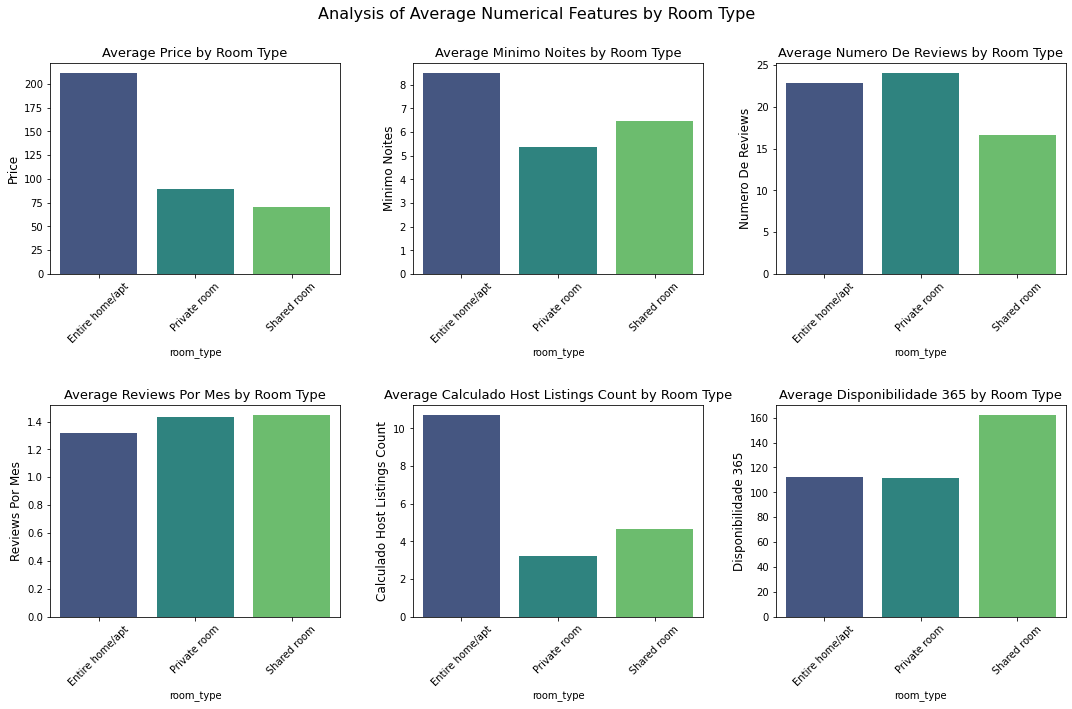

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=[15, 10])
fig.suptitle('Analysis of Average Numerical Features by Room Type\n', fontsize=16)

ax = ax.flatten()

for idx, col in enumerate(num_cols):
    sns.barplot(x='room_type', y=col, data=data, estimator=np.mean, ax=ax[idx], ci=None, palette="viridis") 
    ax[idx].set_ylabel(col.replace('_', ' ').title(), fontsize=12) 
    ax[idx].tick_params(axis='x', rotation=45, labelsize=10) 
    ax[idx].set_title(f'Average {col.replace("_", " ").title()} by Room Type', fontsize=13)  

plt.tight_layout(w_pad=3, h_pad=3)
plt.show()

**Analysis of Average Numerical Features by Room Type**

This second set of bar charts provides a complementary analysis, showing the average numerical features for each room type ("Entire home/apt," "Private room," and "Shared room"). This allows comparison of how these features are affected by the type of accommodation:

- Expected differences in average price across room types, with "Entire home/apt" generally commanding higher prices.

- Differences in minimum nights, review counts, and availability could reflect varying market demands and rental strategies.

## NYC Short-Term Rental Market Segmentation by Neighborhood and Room Type

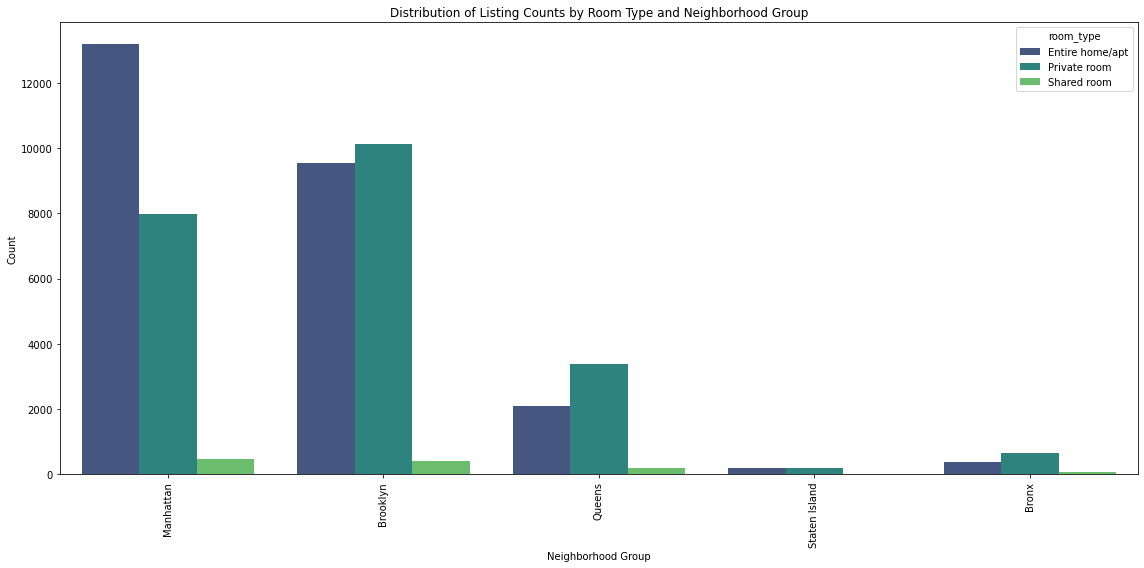

In [41]:
plt.figure(figsize=(16, 8))  
sns.countplot(x='bairro_group', hue='room_type', data=data, palette="viridis")
plt.xticks(rotation=90) 
plt.title('Distribution of Listing Counts by Room Type and Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Distribution of Listing Counts by Room Type and Neighborhood Group**

This bar chart displays the total number of listings for each room type ("Entire home/apt," "Private room," and "Shared room") within each neighborhood group (Manhattan, Brooklyn, Queens, Staten Island, and Bronx).  
- Manhattan clearly dominates in terms of overall listing count, followed by Brooklyn.  
- Queens also has a significant number of listings.  
- Staten Island and the Bronx have considerably fewer listings than the other boroughs.  
- Within each borough, "Entire home/apt" listings are generally the most prevalent, although the proportion varies across neighborhoods.

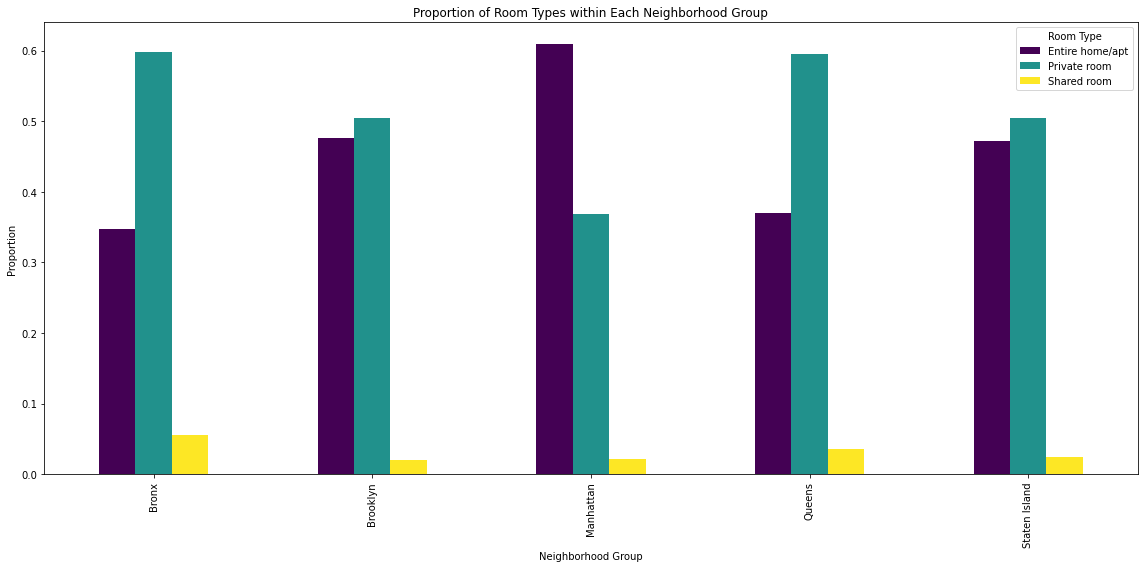

In [82]:
room_type_counts = data.groupby(['bairro_group', 'room_type']).size().unstack()
room_type_proportions = room_type_counts.div(room_type_counts.sum(axis=1), axis=0)

room_type_proportions.plot(kind='bar', figsize=(16, 8), stacked=False, rot=90, colormap='viridis')
plt.title('Proportion of Room Types within Each Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Proportion')
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

**Proportion of Room Types within Each Neighborhood Group**

This grouped bar chart provides a nuanced perspective by showing the proportion of each room type within each neighborhood group. This helps to control for the differing number of overall listings in each borough. 
- While Manhattan and Brooklyn show a higher proportion of "Entire home/apt" listings, the proportions vary significantly across the boroughs, with other room types having a stronger presence in certain areas.  This suggests that the relative availability of different room types might influence choices for potential renters and thus investment strategies in certain neighborhoods.


- In summary, while Manhattan and Brooklyn have the highest number of listings overall, a deeper examination of the relative proportions reveals variations in the prevalence of different room types among the neighborhoods.  This information is valuable when considering investment opportunities, as it indicates potential demand for different accommodation types.

In [86]:
bairro_group_percentage = data['bairro_group'].value_counts(normalize=True) * 100

fig_bairro_group = px.pie(
    values=bairro_group_percentage.values,
    names=bairro_group_percentage.index,
    title='Percentage Distribution of Neighborhood Groups',
    hole=0.3,
    
)

fig_bairro_group.show()

In [84]:
room_type_percentage = data['room_type'].value_counts(normalize=True) * 100

fig_room_type = px.pie(
    values=room_type_percentage.values,
    names=room_type_percentage.index,
    title='Percentage Distribution of Room Types',
    hole=0.3
)

fig_room_type.show()

## Top 10 Neighborhoods with Highest Average Rental Prices

Top 10 bairros with the highest average rental prices:
                 bairro       price   bairro_group
0               Tribeca  490.638418      Manhattan
177           Riverdale  442.090909          Bronx
188   Battery Park City  367.557143      Manhattan
258   Flatiron District  341.925000      Manhattan
338       Randall Manor  336.000000  Staten Island
357                NoHo  295.717949      Manhattan
435                SoHo  287.103352      Manhattan
793             Midtown  282.719094      Manhattan
2338       West Village  267.682292      Manhattan
3106  Greenwich Village  263.405612      Manhattan


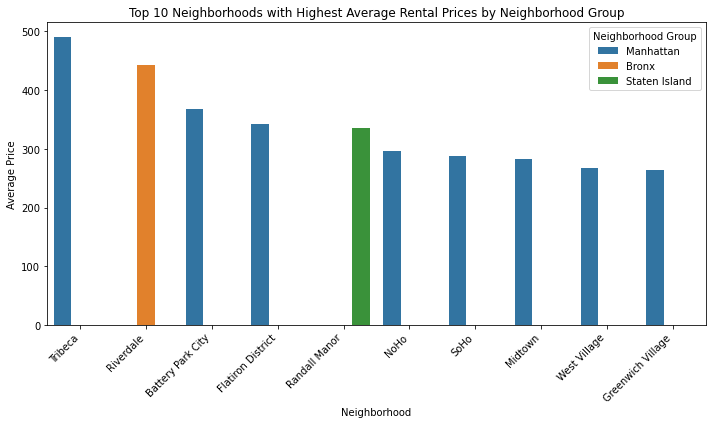

In [46]:
avg_price_by_bairro = data.groupby('bairro')[['price', 'bairro_group']].mean().reset_index()
top_10_bairros = avg_price_by_bairro.sort_values(by='price', ascending=False).head(10)

top_10_bairros = pd.merge(top_10_bairros, data[['bairro', 'bairro_group']], on='bairro', how='left')
top_10_bairros = top_10_bairros.drop_duplicates() 

print("Top 10 bairros with the highest average rental prices:")
print(top_10_bairros)

plt.figure(figsize=(10, 6))
sns.barplot(x='bairro', y='price', data=top_10_bairros, hue='bairro_group')
plt.xlabel("Neighborhood")
plt.ylabel("Average Price")
plt.title("Top 10 Neighborhoods with Highest Average Rental Prices by Neighborhood Group")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(title='Neighborhood Group')
plt.show()

**Top 10 Neighborhoods by Average Rental Price and Neighborhood Group**

The chart highlights a strong concentration of high-priced rentals in Manhattan, which dominates the top ten list. 

This analysis confirms the premium placed on locations within Manhattan while also revealing high-value properties in unexpected locations in the Bronx and Staten Island. This suggests a complex interplay of factors, beyond simple borough location, in determining rental rates within NYC. Further research into the specific characteristics of these top-performing neighborhoods (amenities, proximity to transport, etc.) would provide a more detailed understanding.

## Linguistic Patterns in High-Value Neighborhoods

In [112]:
num_high_value = int(0.30 * len(avg_price_by_bairro))
high_value_neighborhoods = avg_price_by_bairro.nlargest(num_high_value, 'price')

vectorizer = CountVectorizer().fit(high_value_neighborhoods['bairro'])
bag_of_words = vectorizer.transform(high_value_neighborhoods['bairro'])
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

print("Most frequent words in high-value neighborhoods:")
for word, count in words_freq[:20]:
    print(f"{word}: {count}")

Most frequent words in high-value neighborhoods:
hill: 5
district: 3
village: 3
side: 3
east: 3
park: 2
city: 2
west: 2
upper: 2
brooklyn: 2
heights: 2
bay: 2
slope: 2
tribeca: 1
riverdale: 1
battery: 1
flatiron: 1
randall: 1
manor: 1
noho: 1


This analysis aims to identify potential linguistic patterns in the names of high-value neighborhoods that might help explain their higher average rental prices. The underlying hypothesis is that certain words or naming conventions might be associated with desirability, location, or other factors that influence rental rates.

The results reveal that certain words appear more frequently than others in the names of high-value areas. The top words include "hill," "district," "village," and "heights." 

However, it is important to note that this analysis is purely observational; it only points to potential correlations between word usage in neighborhood names and average rental prices. The frequency of a word in neighborhood names does not directly cause higher rental prices. More in-depth investigation is needed to determine whether these linguistic features are actually correlated with other factors, such as amenities, proximity to desirable locations, or historical contexts that affect property values in these areas. Further analysis of additional textual data (such as neighborhood descriptions) may provide more insight. Furthermore, this analysis is limited to the top 30% of neighborhoods, and this may limit the generalizability of these observations.

## Rental Price Trends Over Time: Neighborhood and Room Type Effects

In [74]:
average_prices_year_bairro_group = data.groupby(['ano_ultima_review', 'bairro_group'])['price'].mean().reset_index()
average_prices_month_bairro_group = data.groupby(['mes_ultima_review', 'bairro_group'])['price'].mean().reset_index()

average_prices_year_room_type = data.groupby(['ano_ultima_review', 'room_type'])['price'].mean().reset_index()
average_prices_month_room_type = data.groupby(['mes_ultima_review', 'room_type'])['price'].mean().reset_index()

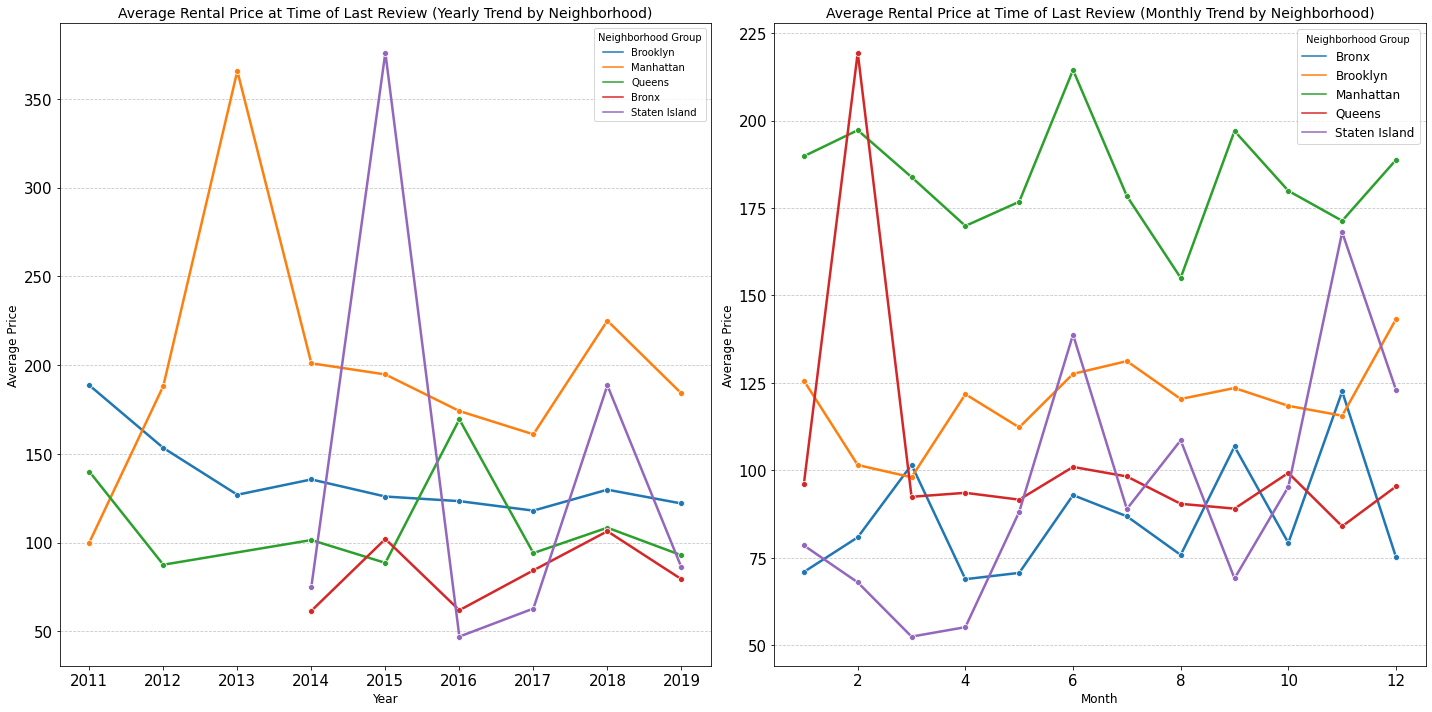

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  

sns.lineplot(x='ano_ultima_review', y='price', hue='bairro_group', data=average_prices_year_bairro_group, marker='o', linewidth=2.5, ax=axes[0])
axes[0].set_xlabel("Year", fontsize=12)
axes[0].set_ylabel("Average Price", fontsize=12)
axes[0].set_title("Average Rental Price at Time of Last Review (Yearly Trend by Neighborhood)", fontsize=14)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[0].legend(title='Neighborhood Group', fontsize=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.lineplot(x='mes_ultima_review', y='price', hue='bairro_group', data=average_prices_month_bairro_group, marker='o', linewidth=2.5, ax=axes[1])
axes[1].set_xlabel("Month", fontsize=12)
axes[1].set_ylabel("Average Price", fontsize=12)
axes[1].set_title("Average Rental Price at Time of Last Review (Monthly Trend by Neighborhood)", fontsize=14)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)
axes[1].legend(title='Neighborhood Group', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

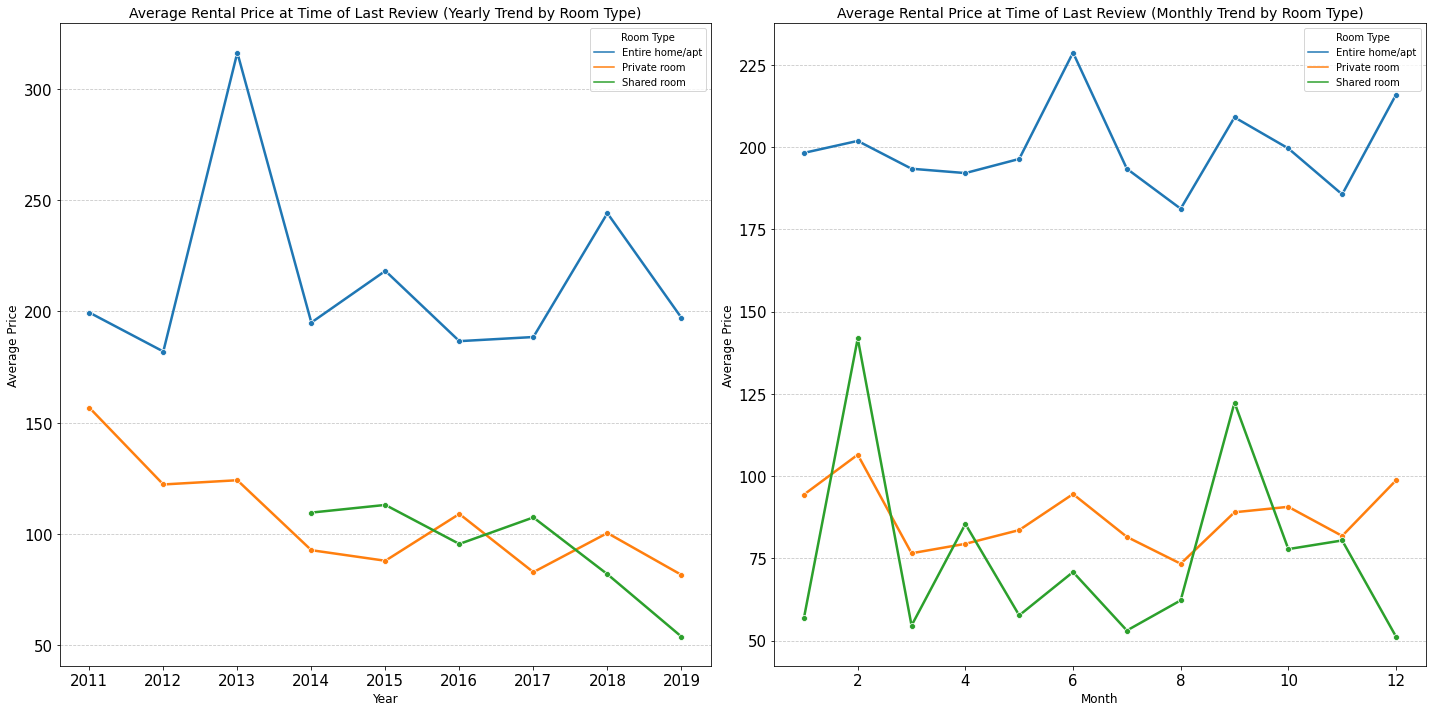

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  

sns.lineplot(x='ano_ultima_review', y='price', hue='room_type', data=average_prices_year_room_type, marker='o', linewidth=2.5, ax=axes[0])
axes[0].set_xlabel("Year", fontsize=12)
axes[0].set_ylabel("Average Price", fontsize=12)
axes[0].set_title("Average Rental Price at Time of Last Review (Yearly Trend by Room Type)", fontsize=14)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[0].legend(title='Room Type', fontsize=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.lineplot(x='mes_ultima_review', y='price', hue='room_type', data=average_prices_month_room_type, marker='o', linewidth=2.5, ax=axes[1])
axes[1].set_xlabel("Month", fontsize=12)
axes[1].set_ylabel("Average Price", fontsize=12)
axes[1].set_title("Average Rental Price at Time of Last Review (Monthly Trend by Room Type)", fontsize=14)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)
axes[1].legend(title='Room Type', fontsize=10)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()